Populating the interactive namespace from numpy and matplotlib


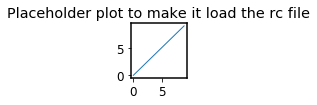

In [1]:
%pylab inline
import poppy
import astropy.units as u
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,7)
matplotlib.rcParams['font.size'] =12
plt.figure(figsize=(1,1))
plt.plot(np.arange(10))
plt.title("Placeholder plot to make it load the rc file")
plt.show()
matplotlib.rcParams['figure.figsize'] = (10,7)
matplotlib.rcParams['font.size'] =12

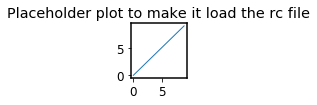

In [2]:
matplotlib.rcParams['figure.figsize'] = (10,7)
matplotlib.rcParams['font.size'] =12
plt.figure(figsize=(1,1))
plt.plot(np.arange(10))
plt.title("Placeholder plot to make it load the rc file")
plt.show()

# Available Optical Element Classes

There are many available predefined types of optical elements in poppy. In addition you can easily specify your own custom optics.

* [Pupils and Aperture Stops](#Pupils-and-Aperture-Stops)
* [Image Plane Elements](#Image-Plane-Elements)
* [General Purpose Elements](#General-Purpose-Elements)
* [Wavefront Errors](#Wavefront-Errors)
* [Deformable Mirrors](#Deformable-Mirrors)
* [Supplying Custom Optics from Files or Arrays](#Supplying-Custom-Optics-from-Files-or-Arrays)

## Pupils and Aperture Stops

These optics have dimensions specified in meters, or other units of length. They can be used in the pupil planes of a Fraunhofer optical system, or any plane of a Fresnel optical system.
All of these may be translated or rotated around in the plane by setting the `rotation`, `shift_x` or `shift_y` parameters. 

### CircularAperture
A basic aperture stop.

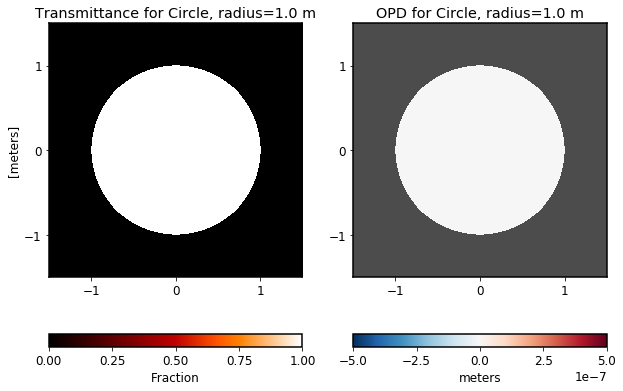

In [3]:
optic = poppy.CircularAperture(radius=1)
optic.display(what='both');

### SquareAperture
A square stop. The specified size is the length across any one side. 

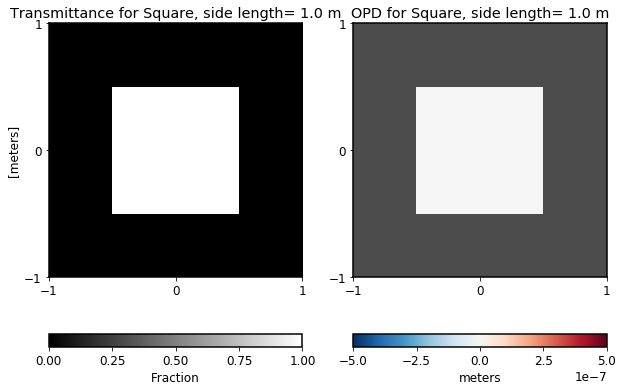

In [4]:
optic = poppy.SquareAperture(size=1.0)
optic.display(what='both');

#### RectangularAperture
Specify the width and height to define a rectangle.

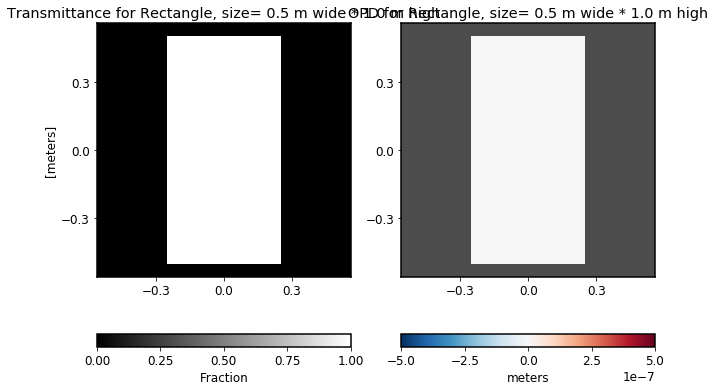

In [5]:
optic = poppy.RectangleAperture(width=0.5*u.m, height=1.0*u.m)
optic.display(what='both');

### HexagonAperture
For instance, one segment of a segmented mirror.

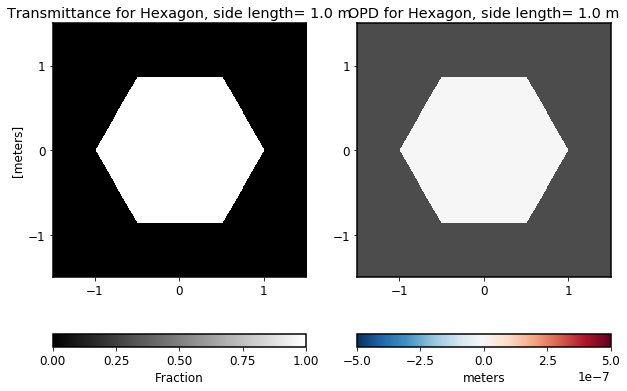

In [6]:
optic = poppy.HexagonAperture(side=1.0)
optic.display(what='both');

### MultiHexagonAperture
Arbitrarily many hexagons, in rings. You can adjust the size of each hex, the gap width between them, and whether any hexes are missing (in particular the center one). 

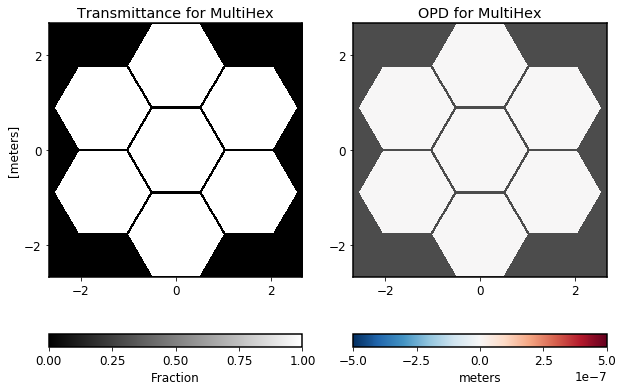

In [7]:
optic = poppy.MultiHexagonAperture(side=1, rings=1, gap=0.05, center=True)
optic.display(what='both');

### NgonAperture
Triangular apertures or other regular polygons besides hexagons are uncommon, but a generalized N-gon aperture allows modeling them if needed. 

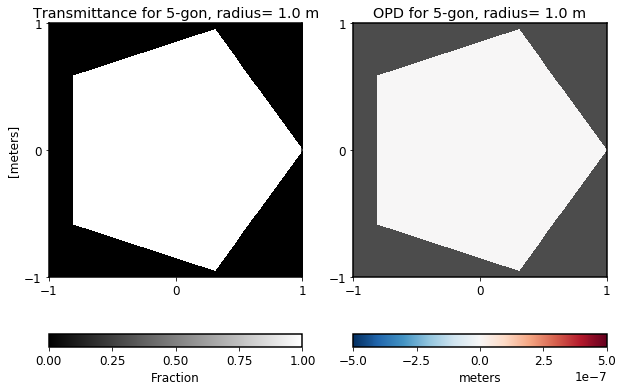

In [8]:
optic = poppy.NgonAperture(nsides=5)
optic.display(what='both');

###  SecondaryObscuration
This class adds an obstruction which is supported by a regular evenly-spaced grid of identical struts, or set `n_supports=0` for a free-standing obscuration.

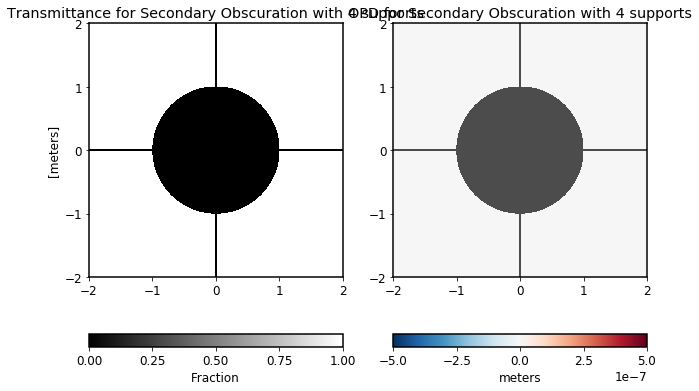

In [9]:
optic = poppy.SecondaryObscuration(secondary_radius=1.0, 
                                   n_supports=4, 
                                   support_width=5*u.cm)
optic.display(what='both');

###  AsymmetricSecondaryObscuration
This class allows making more complex "spider" support patterns than the SecondaryObscuration class. Each strut may individually be adjusted in angle, width, and offset in x and y from the center of the aperture.  Angles are given in a convention such that the +Y axis is 0 degrees, and increase counterclockwise (based on the typical astronomical convention that north is the origin for position angles, increasing towards east.) 

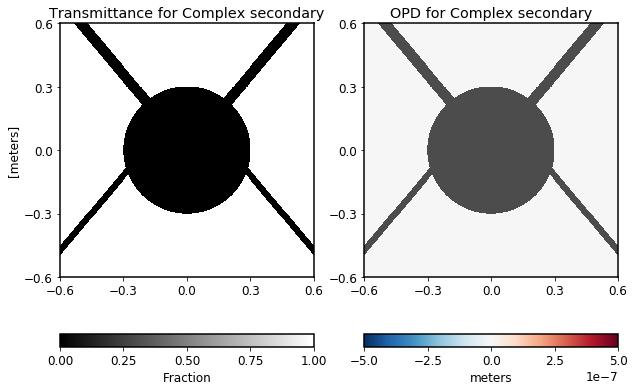

In [10]:
optic = poppy.AsymmetricSecondaryObscuration(secondary_radius=0.3*u.m, 
                                             support_angle=(40, 140, 220, 320),
                                             support_width=[0.05, 0.03, 0.03, 0.05], 
                                             support_offset_x=[0, -0.2, 0.2, 0],
                                             name='Complex secondary')
optic.display(what='both');

### ThinLens
This models a lens or powered mirror in the thin-lens approximation, with the retardance specified in terms of a number of waves at a given wavelength. The lens is perfectly achromatic. 

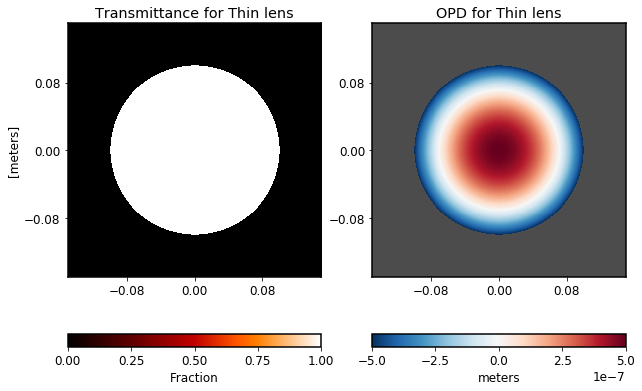

In [11]:
optic = poppy.ThinLens(nwaves=1, reference_wavelength=1e-6*u.m, radius=10*u.cm)
optic.display(what='both');

### GaussianAperture
This Gaussian profile can be used for instance to model an apodizer in the pupil plane, or to model a beam launched from a fiber optic. 

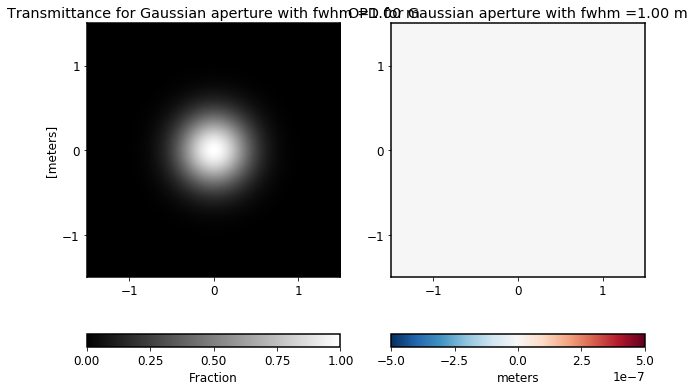

In [12]:
optic = poppy.GaussianAperture(fwhm=1*u.m)
optic.display(what='both');

#### KnifeEdge
A knife edge is an infinite opaque half-plane.

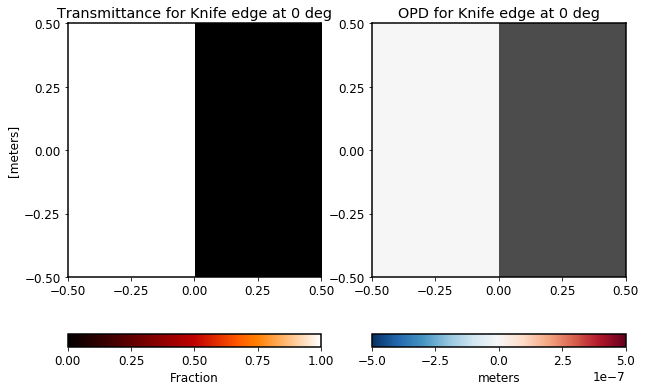

In [13]:
optic = poppy.optics.KnifeEdge(rotation=0)
optic.display(what='both');

## Image Plane Elements
Image plane classes have dimensions specified in units of arcseconds projected onto the sky. These classes can be placed in image planes in either Fraunhofer or Fresnel optical systems. 

### SquareFieldStop

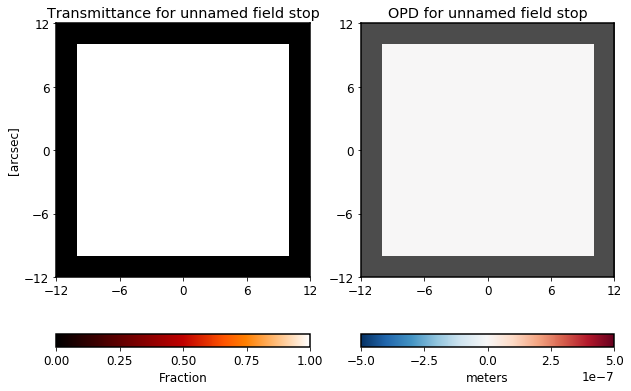

In [14]:
optic = poppy.SquareFieldStop()
optic.display(what='both');

### RectangularFieldStop

This class can be used to implement a spectrograph slit, for instance.

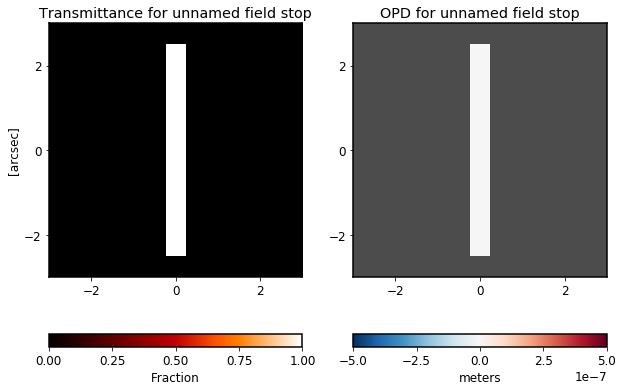

In [15]:
optic = poppy.RectangularFieldStop()
optic.display(what='both');

### AnnularFieldStop
You can also use this as a circular field stop by setting `radius_inner=0`.

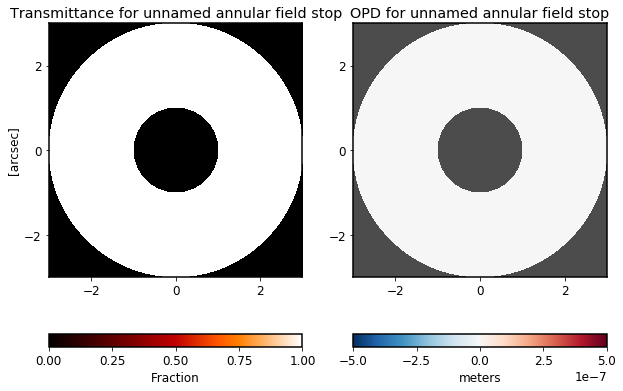

In [16]:
optic = poppy.optics.AnnularFieldStop(radius_inner=1, radius_outer=3)
optic.display(what='both');

### HexagonFieldStop

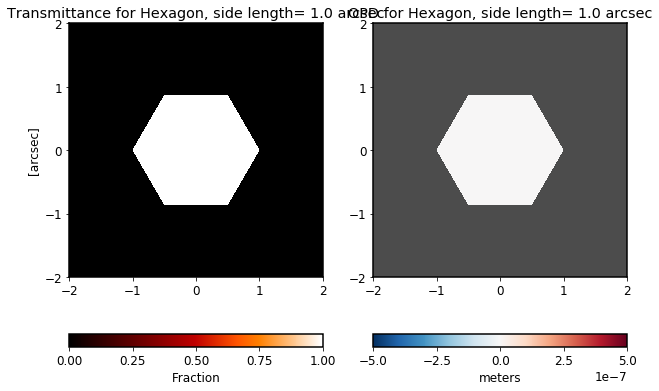

In [17]:
optic = poppy.optics.HexagonFieldStop()
optic.display(what='both');

### CircularOcculter

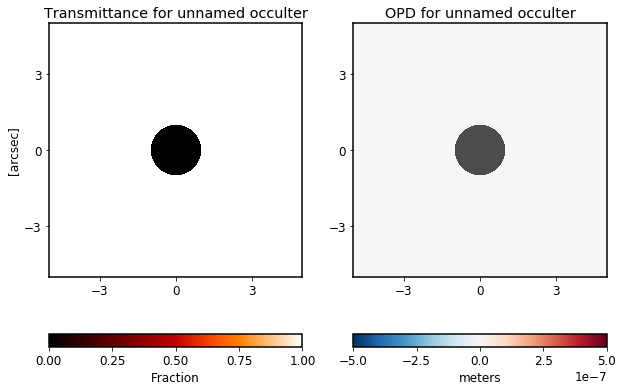

In [19]:
optic = poppy.optics.CircularOcculter()
optic.display(what='both');

#### BarOcculter

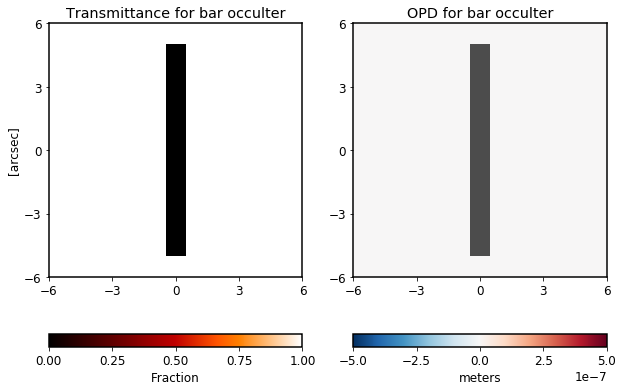

In [20]:
optic = poppy.optics.BarOcculter(width=1, height=10)
optic.display(what='both');

### BandLimitedCoronagraph

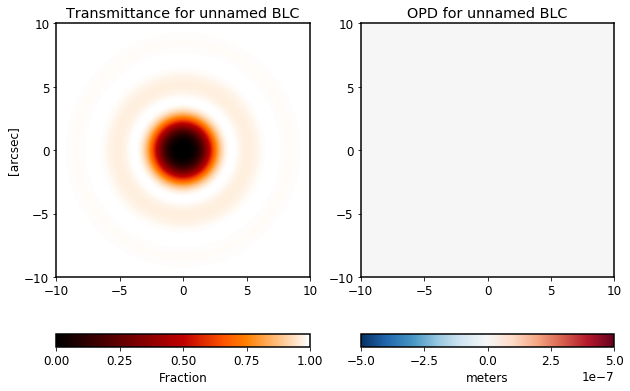

In [21]:
optic = poppy.BandLimitedCoronagraph()
optic.display(what='both');

### Four Quadrant Phase Mask
The class is named `IdealFQPM` because this implements a notionally perfect 4QPM at some given wavelength; it has precisely half a wave retardance at the reference wavelength. 

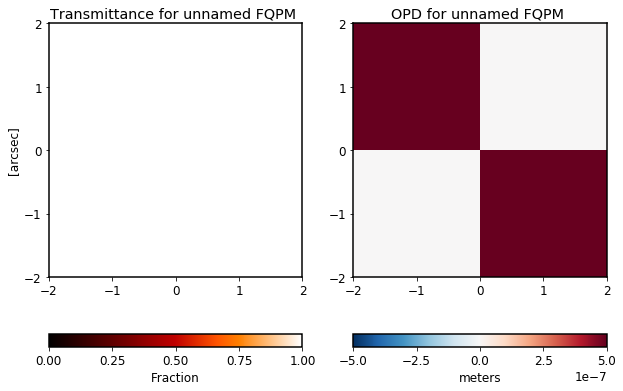

In [22]:
optic = poppy.IdealFQPM(wavelength=1*u.micron)
optic.display(what='both');

## General Purpose Elements

### ScalarTransmission
This class implements a uniformly multiplicative transmission factor, i.e. a neutral density filter. 

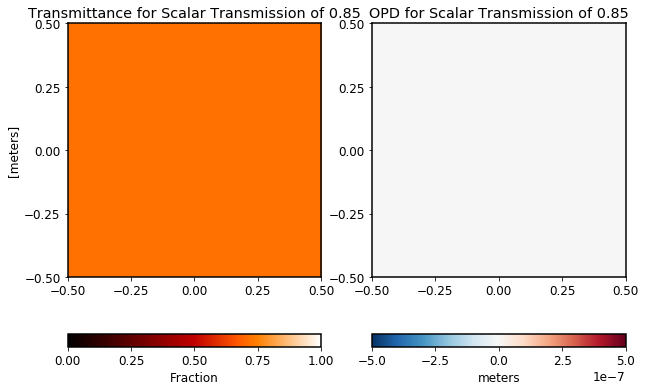

In [3]:
optic = poppy.ScalarTransmission(transmission=0.85)
optic.display(what='both');

### Inverse Transmission
This optic acts on another to flip the transmission: Areas which were 0 become 1 and vice versa. This operation is not meant as a representative of some real physical process itself, but can be useful in building certain types of compound optics. 

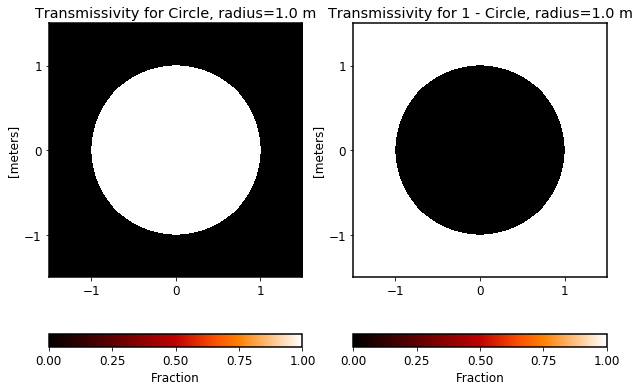

In [4]:
circ = poppy.CircularAperture(radius=1)
ax1= plt.subplot(121)
circ.display(what='amplitude', ax=ax1)

ax2= plt.subplot(122)
inverted_circ = poppy.InverseTransmission(circ)
inverted_circ.display(grid_size=3, what='amplitude', ax=ax2)

## Wavefront Errors

### ZernikeWFE
Wavefront errors can be specified by giving a list of Zernike coefficients, which are ordered using the Noll indexing convention. The different Zernikes are then added together to make an overall wavefront map.

Note that while the Zernikes are defined with respect to some notional circular aperture of a given radius, by default this class just implements the _wavefront error_ part, not the aperture stop. 

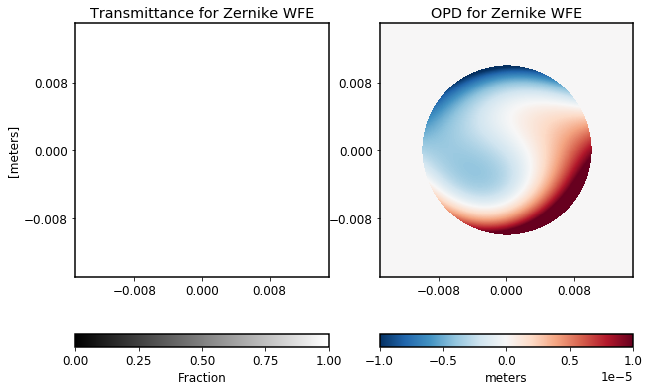

In [5]:
optic = poppy.ZernikeWFE(radius=1*u.cm, 
                        coefficients=[0.1e-6, 3e-6, -3e-6, 1e-6, -7e-7, 0.4e-6, -2e-6],
                        aperture_stop=False)
optic.display(what='both', opd_vmax=1e-5, grid_size=0.03);

You can optionally set the parameter `aperture_stop=True` to ZernikeWFE if you want it to also act as a circular aperture stop. 

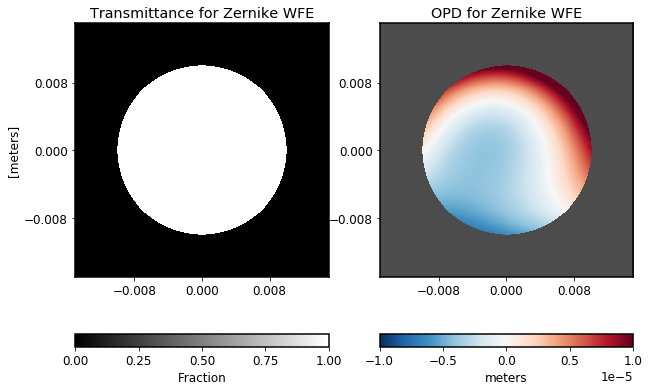

In [8]:
optic = poppy.ZernikeWFE(radius=1*u.cm, 
                        coefficients=[0, 2e-6, 3e-6, 2e-6, 0, 0.4e-6, 1e-6],
                        aperture_stop=True)
optic.display(what='both', opd_vmax=1e-5, grid_size=0.03);

### SineWaveWFE
A sinusoidal ripple across a mirror, for instance a deformable mirror. Specify the ripple by the spatial frequency (i.e. cycles per meter). Use the `amplitude`, `rotation` and `phaseoffset` parameters to adjust the sine wave. 

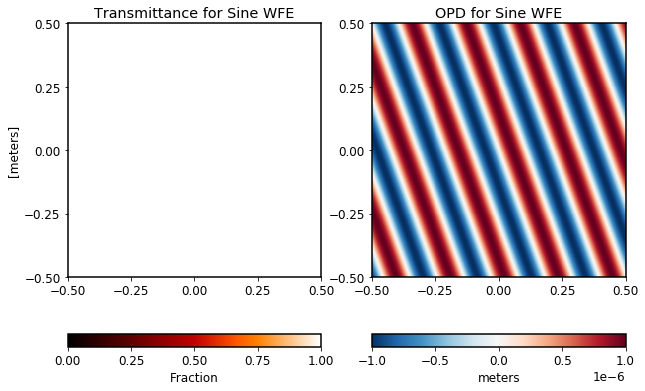

In [16]:
optic = poppy.SineWaveWFE(spatialfreq=5/u.meter, 
                          amplitude=1*u.micron,
                          rotation=20)
optic.display(what='both', opd_vmax=1*u.micron);